<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Question5-2-TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

https://datascience.stackexchange.com/questions/54904/how-to-avoid-tokenizing-w-sklearn-feature-extraction


https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform

https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html

https://github.com/brandomr/document_cluster/blob/master/cluster_analysis.ipynb

In [1]:
pip install gensim
pip install pyLDAvis

In [48]:
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import datetime
from zipfile import ZipFile
from gzip import decompress
from json import loads
from requests import get
import requests, zipfile, io
from bs4 import BeautifulSoup
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import gensim
from gensim import corpora
from gensim.models import LsiModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_texts
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_punctuation2, strip_short, strip_numeric, stem_text
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
df = pd.read_csv("pubmed_results.csv")
df.dropna(inplace=True)
df

,year,month,title,day,abstract
1,2012,7,Golimumab for the treatment of psoriatic arthr...,5,This paper presents a summary of the evidence ...
2,2012,7,Liraglutide for the treatment of type 2 diabetes.,5,This paper presents a summary of the evidence ...
3,2012,7,Trabectedin for the treatment of relapsed ovar...,5,The paper presents a summary of the evidence r...
4,2012,7,Ofatumumab for the treatment of chronic lympho...,5,This paper presents a summary of the evidence ...
5,2012,7,Denosumab for the prevention of osteoporotic f...,5,This paper presents a summary of the evidence ...
...,...,...,...,...,...
995,2020,12,Using Whatsapp for the Consultation of Covid-1...,4,"Telephone, internet-connected devices (phablet..."
996,2020,12,A comprehensive study on ozone pollution in a ...,4,Tropospheric ozone (O3) pollution has b
997,2020,12,Long-term exposure to low-level air pollution ...,4,Air pollution has been suggested as a risk fac...
998,2020,12,Radiation-induced lens opacities: Epidemiologi...,4,"In 2011, the International Commission on Radio..."


In [ ]:
all_sentences = df['title'].to_numpy()
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
all_words

In [53]:
import string
# @title Stopword removal 
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if (w not in stopwords.words('english')) & (w not in string.punctuation) ]
    

In [55]:
common_dictionary = corpora.Dictionary(all_words)
common_dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [56]:
common_corpus = [common_dictionary.doc2bow(doc) for doc in all_words]

In [9]:
def create_gensim_lsi_model(common_corpus, common_dictionary):
    # generate LSI model
    lsamodel = LsiModel(common_corpus, id2word = common_dictionary, num_topics=5)  # train model
    print(lsamodel.print_topics())
    return lsamodel

In [13]:
def create_gensim_lda_model(common_corpus, common_dictionary):
    # generate LDA model
    lsamodel = gensim.models.LdaMulticore(common_corpus, num_topics=5, id2word=common_dictionary, passes=3, workers=2)  # train model
    print(lsamodel.print_topics())
    return lsamodel

In [37]:
lsi_model = create_gensim_lsi_model(common_corpus=common_corpus, common_dictionary=common_dictionary)


[(0, '0.696*"(" + 0.696*")" + 0.084*";" + 0.076*"The" + 0.056*"patients" + 0.050*"care" + 0.048*"treatment" + 0.043*"cancer" + 0.040*"review" + 0.036*"disease"'), (1, '0.750*"The" + 0.350*"patients" + 0.261*"care" + 0.241*"disease" + 0.207*"cancer" + 0.188*";" + 0.169*"study" + 0.119*"-" + 0.116*"home" + -0.100*"("'), (2, '0.959*";" + -0.169*"patients" + -0.120*"care" + 0.082*"Development" + -0.074*"The" + -0.060*"disease" + -0.057*"study" + 0.056*"\'s" + -0.048*"cancer" + 0.047*"Study"'), (3, '0.627*"The" + -0.538*"patients" + -0.317*"disease" + -0.283*"cancer" + -0.226*"care" + -0.142*"?" + -0.125*"study" + -0.121*";" + -0.078*"home" + -0.077*"treatment"'), (4, '-0.606*"study" + 0.475*"patients" + -0.375*"cancer" + -0.339*"care" + 0.275*"disease" + -0.131*"among" + -0.123*"-" + -0.108*"home" + 0.107*"The" + -0.077*"case"')]


In [ ]:
lda_model = create_gensim_lda_model(common_corpus, common_dictionary)

In [ ]:
from collections import OrderedDict
data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}
data_lda

In [61]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)


(5, 23)


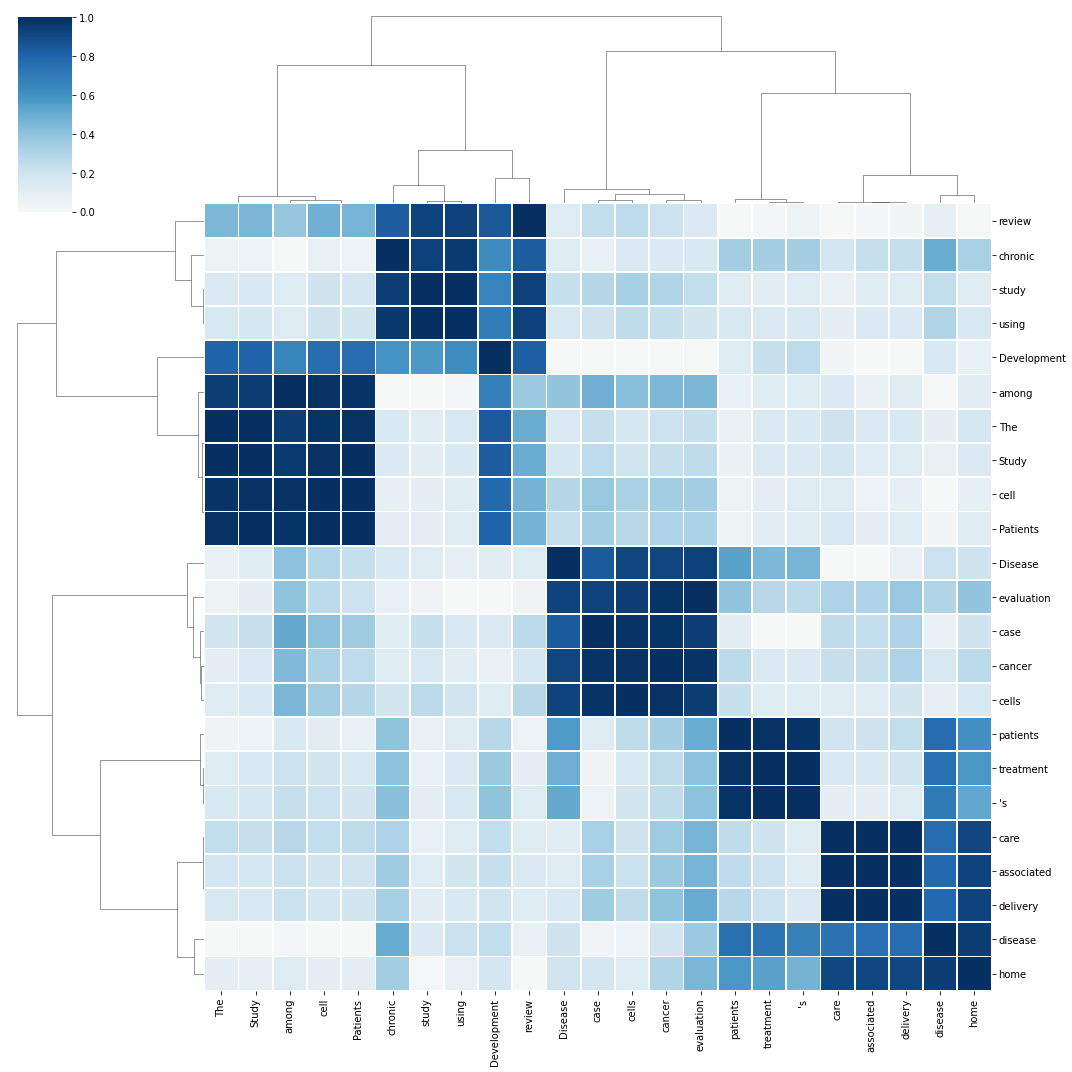

In [62]:
import seaborn as sns
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [64]:
import pyLDAvis.gensim
corpus_lda = lda_model[common_corpus]
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model, corpus_lda, common_dictionary, mds='tsne')
panel


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  31.666514
2       51.163364 -159.968018       2        1  28.948913
3      -73.144554   21.523815       3        1  19.112630
0      -66.410133 -110.606438       4        1  10.267737
4       54.417324   12.443444       5        1  10.004208, topic_info=        Term       Freq      Total Category  logprob  loglift
5      study  99.000000  99.000000  Default  23.0000  23.0000
7        The  41.000000  41.000000  Default  22.0000  22.0000
1     cancer  57.000000  57.000000  Default  21.0000  21.0000
4      using  47.000000  47.000000  Default  20.0000  20.0000
12        's  46.000000  46.000000  Default  19.0000  19.0000
..       ...        ...        ...      ...      ...      ...
22     cells   0.097912  28.411135   Topic5  -6.7161  -3.3683
2    chronic   0.096192  34.306212   Topic5  -6.7338  -3.5746
3   patients   0.215219  91.532555   Topic5  -5.9285  -3.7506
4      using   0.096837  47.589519   Topic5  -6.7271  -3.8952
1     cancer   0.099060  57.549601   Topic5  -6.7044  -4.0625

[138 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
12        1  0.958557           's
12        2  0.021301           's
16        1  0.285370  Development
16        2  0.407671  Development
16        3  0.081534  Development
...     ...       ...          ...
0         1  0.930302    treatment
0         2  0.018986    treatment
0         3  0.018986    treatment
0         4  0.037972    treatment
4         2  0.987612        using

[81 rows x 3 columns], R=23, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1, 5])